### Step 1.1 Imports 

In [41]:
# Importing necessary libraries
# Data manipulation
import pandas as pd
import numpy as np
# Data visualization
import matplotlib.pyplot as plt
import seaborn as sns
sns.set(style="whitegrid")
# Preprocessing
from sklearn.preprocessing import StandardScaler,LabelEncoder, OneHotEncoder
from sklearn.model_selection import train_test_split
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
# Modeling
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier
# Evaluation
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
import math
from warnings import filterwarnings
filterwarnings('ignore')

### Step 1.2 Data Loading

In [18]:
df = pd.read_csv('shopping_behavior_updated.csv')
df.head()

,Customer ID,Age,Gender,Item Purchased,Category,Purchase Amount (USD),Location,Size,Color,Season,Review Rating,Subscription Status,Discount Applied,Previous Purchases,Payment Method,Frequency of Purchases
0,1,55,Male,Blouse,Clothing,53,Kentucky,L,Gray,Winter,3.1,Yes,Yes,14,Venmo,Fortnightly
1,2,19,Male,Sweater,Clothing,64,Maine,L,Maroon,Winter,3.1,Yes,Yes,2,Cash,Fortnightly
2,3,50,Male,Jeans,Clothing,73,Massachusetts,S,Maroon,Spring,3.1,Yes,Yes,23,Credit Card,Weekly
3,4,21,Male,Sandals,Footwear,90,Rhode Island,M,Maroon,Spring,3.5,Yes,Yes,49,PayPal,Weekly
4,5,45,Male,Blouse,Clothing,49,Oregon,M,Turquoise,Spring,2.7,Yes,Yes,31,PayPal,Annually


### Step 2 Data Understaning

In [19]:
# Displaying datatypes and missing values
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3900 entries, 0 to 3899
Data columns (total 16 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   Customer ID             3900 non-null   int64  
 1   Age                     3900 non-null   int64  
 2   Gender                  3900 non-null   object 
 3   Item Purchased          3900 non-null   object 
 4   Category                3900 non-null   object 
 5   Purchase Amount (USD)   3900 non-null   int64  
 6   Location                3900 non-null   object 
 7   Size                    3900 non-null   object 
 8   Color                   3900 non-null   object 
 9   Season                  3900 non-null   object 
 10  Review Rating           3900 non-null   float64
 11  Subscription Status     3900 non-null   object 
 12  Discount Applied        3900 non-null   object 
 13  Previous Purchases      3900 non-null   int64  
 14  Payment Method          3900 non-null   

In [20]:
# Displaying basic statistics
df.describe(include='all')

,Customer ID,Age,Gender,Item Purchased,Category,Purchase Amount (USD),Location,Size,Color,Season,Review Rating,Subscription Status,Discount Applied,Previous Purchases,Payment Method,Frequency of Purchases
count,3900.000000,3900.000000,3900,3900,3900,3900.000000,3900,3900,3900,3900,3900.000000,3900,3900,3900.000000,3900,3900
unique,NaN,NaN,2,25,4,NaN,50,4,25,4,NaN,2,2,NaN,6,7
top,NaN,NaN,Male,Blouse,Clothing,NaN,Montana,M,Olive,Spring,NaN,No,No,NaN,PayPal,Every 3 Months
freq,NaN,NaN,2652,171,1737,NaN,96,1755,177,999,NaN,2847,2223,NaN,677,584
mean,1950.500000,44.068462,NaN,NaN,NaN,59.764359,NaN,NaN,NaN,NaN,3.749949,NaN,NaN,25.351538,NaN,NaN
std,1125.977353,15.207589,NaN,NaN,NaN,23.685392,NaN,NaN,NaN,NaN,0.716223,NaN,NaN,14.447125,NaN,NaN
min,1.000000,18.000000,NaN,NaN,NaN,20.000000,NaN,NaN,NaN,NaN,2.500000,NaN,NaN,1.000000,NaN,NaN
25%,975.750000,31.000000,NaN,NaN,NaN,39.000000,NaN,NaN,NaN,NaN,3.100000,NaN,NaN,13.000000,NaN,NaN
50%,1950.500000,44.000000,NaN,NaN,NaN,60.000000,NaN,NaN,NaN,NaN,3.700000,NaN,NaN,25.000000,NaN,NaN
75%,2925.250000,57.000000,NaN,NaN,NaN,81.000000,NaN,NaN,NaN,NaN,4.400000,NaN,NaN,38.000000,NaN,NaN


In [21]:
# Checking for missing values
missing_values = df.isnull().sum()
print("Missing values in each column:\n", missing_values)

Missing values in each column:
 Customer ID               0
Age                       0
Gender                    0
Item Purchased            0
Category                  0
Purchase Amount (USD)     0
Location                  0
Size                      0
Color                     0
Season                    0
Review Rating             0
Subscription Status       0
Discount Applied          0
Previous Purchases        0
Payment Method            0
Frequency of Purchases    0
dtype: int64


In [22]:
# Checking unique values in each column
df.nunique()

Customer ID               3900
Age                         53
Gender                       2
Item Purchased              25
Category                     4
Purchase Amount (USD)       81
Location                    50
Size                         4
Color                       25
Season                       4
Review Rating               26
Subscription Status          2
Discount Applied             2
Previous Purchases          50
Payment Method               6
Frequency of Purchases       7
dtype: int64

### Step 3 Target Engineering
#### Transforming the Target variable

In [23]:
# Converting (1-5 Star Ratings) into Low , Medium , High
def categorize_rating(rating):
    if rating <= 2:
        return 'Low'
    elif rating == 3:
        return 'Medium'
    else:
        return 'High'
df['Rating_Category'] = df['Review Rating'].apply(categorize_rating)

# Encode target numericallly for modeling
target_mapper = {'Low': 0, 'Medium': 1, 'High': 2}
df['Rating_label'] = df['Rating_Category'].map(target_mapper)
df[['Review Rating', 'Rating_Category', 'Rating_label']].head()


,Review Rating,Rating_Category,Rating_label
0,3.1,High,2
1,3.1,High,2
2,3.1,High,2
3,3.5,High,2
4,2.7,High,2


### Step 4 Exploratory Data Analysis

### 4.1 Target Variable distribution

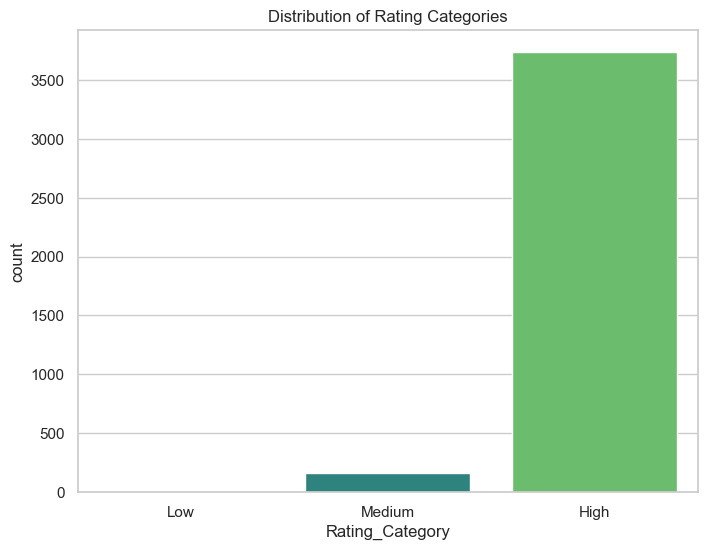

In [24]:
# Showing distribution of the target variable
# Help identify class imbalance-critical for model fairness and performance
plt.figure(figsize=(8,6))
sns.countplot(x='Rating_Category', data=df, order=['Low', 'Medium', 'High'], palette='viridis')
plt.title('Distribution of Rating Categories')      
plt.show()

### 4.2 Numerical Variable distribution

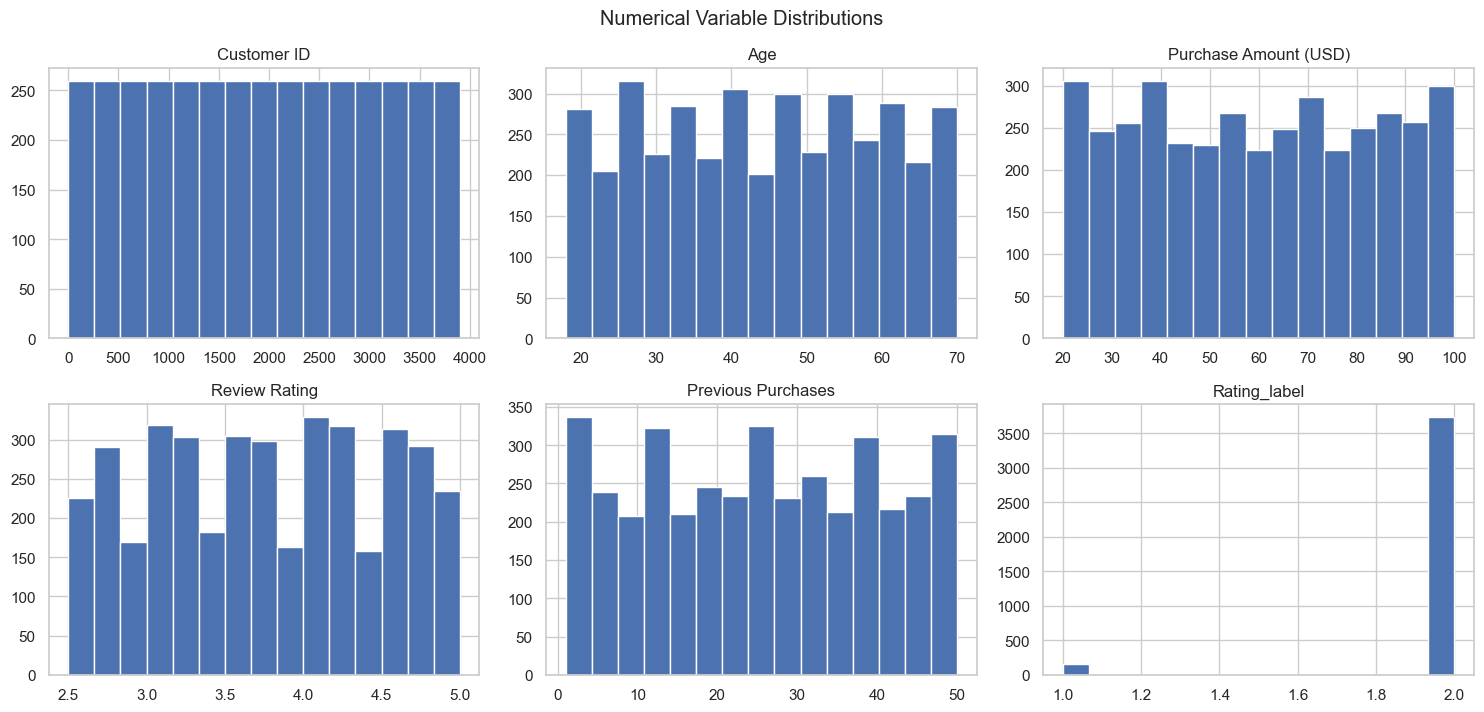

In [25]:
# plotting histograms for numerical variables
# Shows skewness, normality and value spread
numerical_cols = df.select_dtypes(include=['int64', 'float64']).columns
df[numerical_cols].hist(bins=15, figsize=(15, 10), layout=(3, 3))
plt.tight_layout()  
plt.suptitle('Numerical Variable Distributions', y=1.02)
plt.show()

### 4.3 Numerical Outliers 

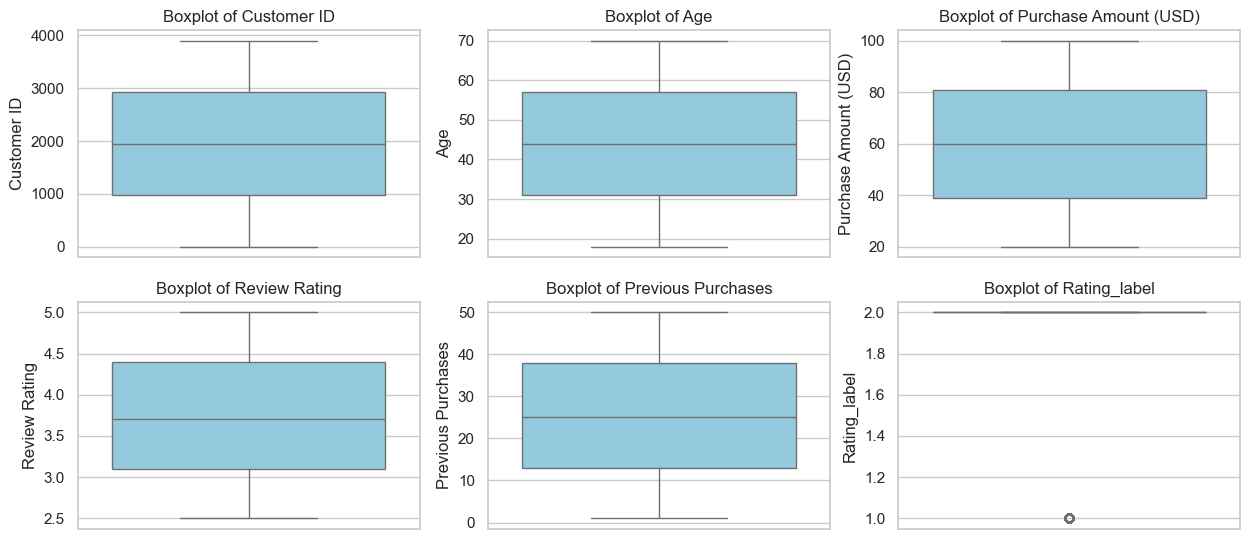

In [26]:
# Plotting boxplots for numerical variables to identify outliers
# Identifies extreme values that may need scaling or winsorizing
plt.figure(figsize=(15, 10))    
for i, col in enumerate(numerical_cols):
    plt.subplot(3, 3, i + 1)
    sns.boxplot(y=df[col], color='skyblue')
    plt.title(f'Boxplot of {col}')

### 4.4 Categorical Feature Exploration

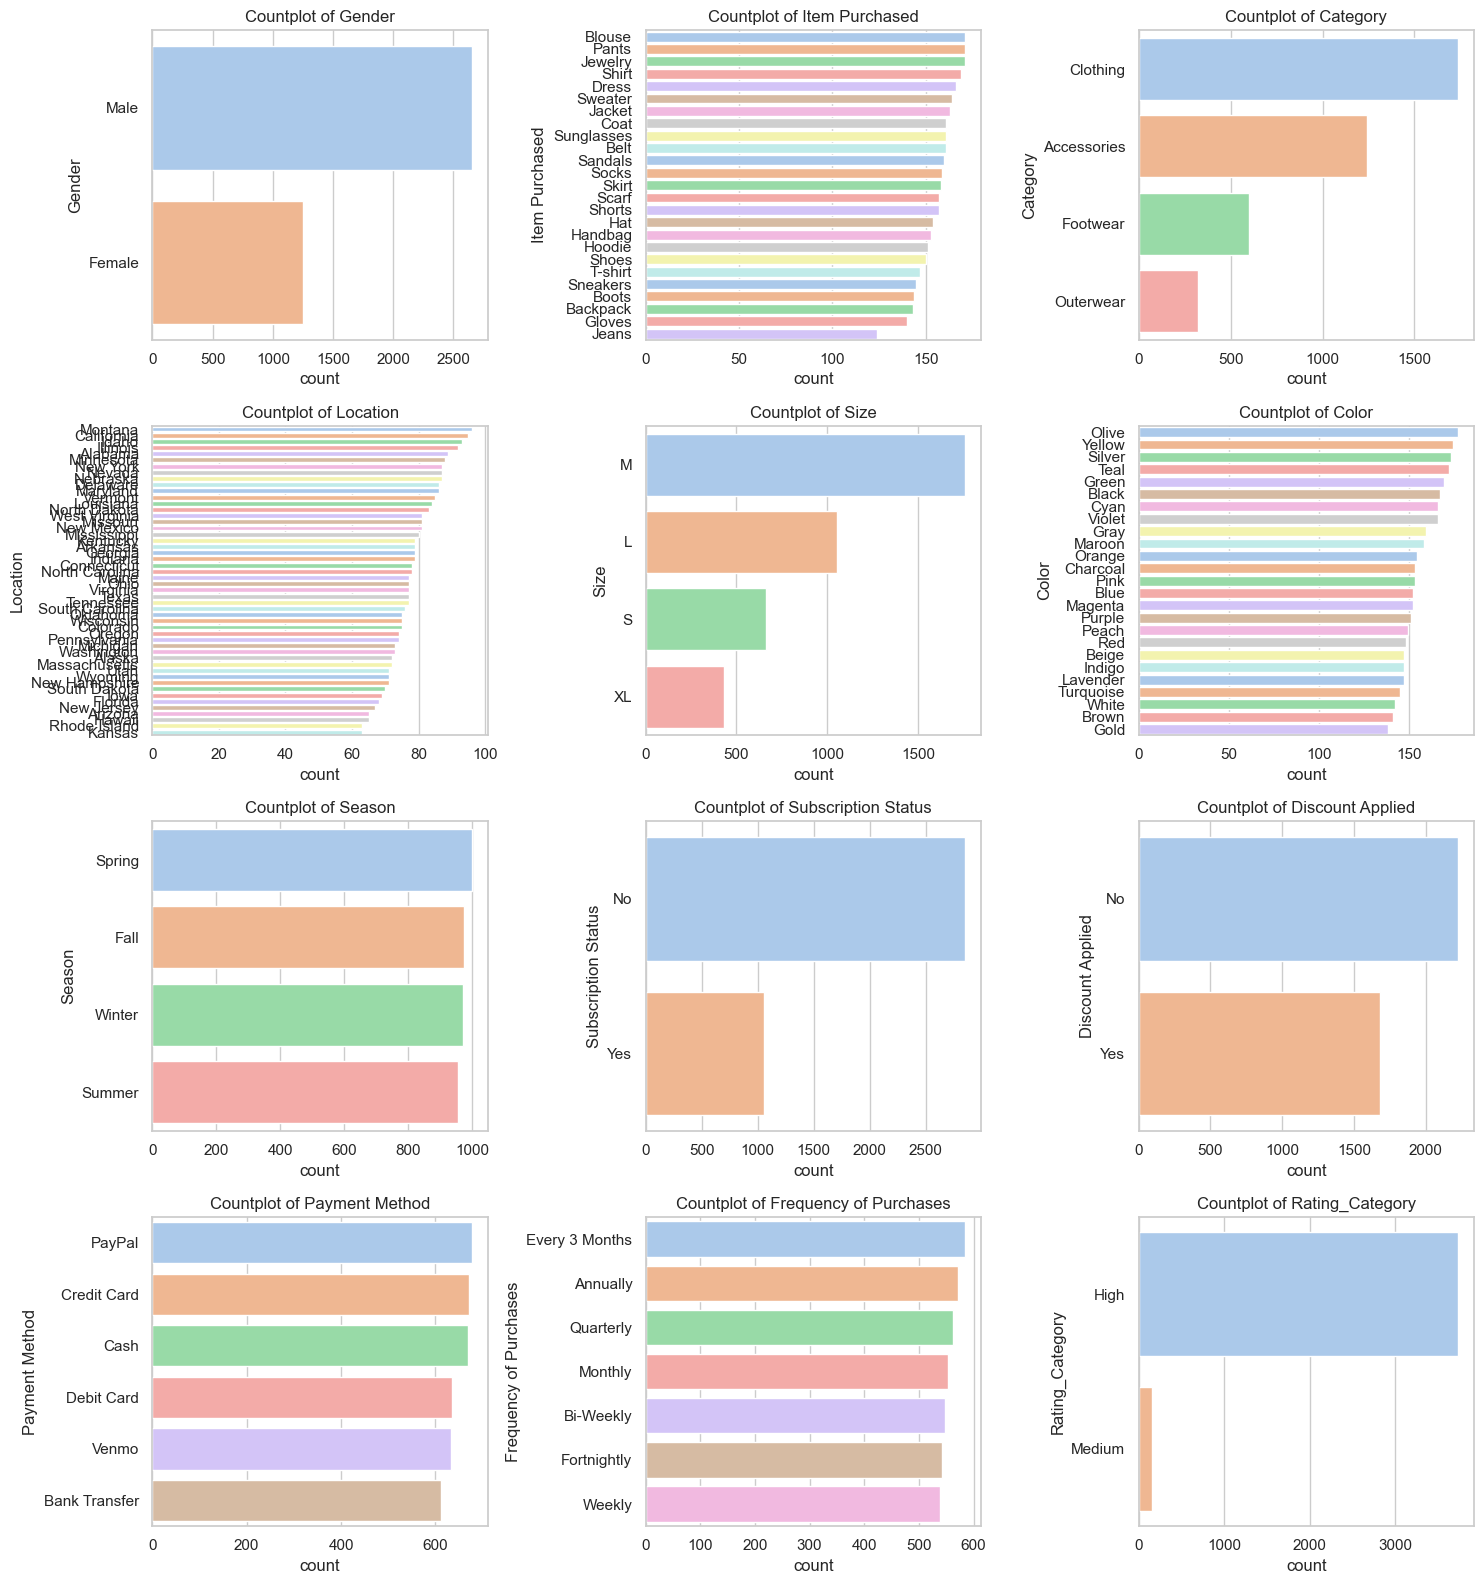

In [27]:
# Plotting countplots for categorical features
# Helps identify dominant categroies and feature imbalance
categorical_cols = df.select_dtypes(include=['object']).columns

num_cols = len(categorical_cols)
cols = 3
rows = math.ceil(num_cols / cols)

plt.figure(figsize=(15, rows * 4)) 

for i, col in enumerate(categorical_cols, 1):
    plt.subplot(rows, cols, i)
    sns.countplot(y=df[col], order=df[col].value_counts().index, palette='pastel')
    plt.title(f'Countplot of {col}')
plt.tight_layout()
plt.show()

### 4.5 Feature Target Relationships

#### 4.5.1 Numerical Vs Target

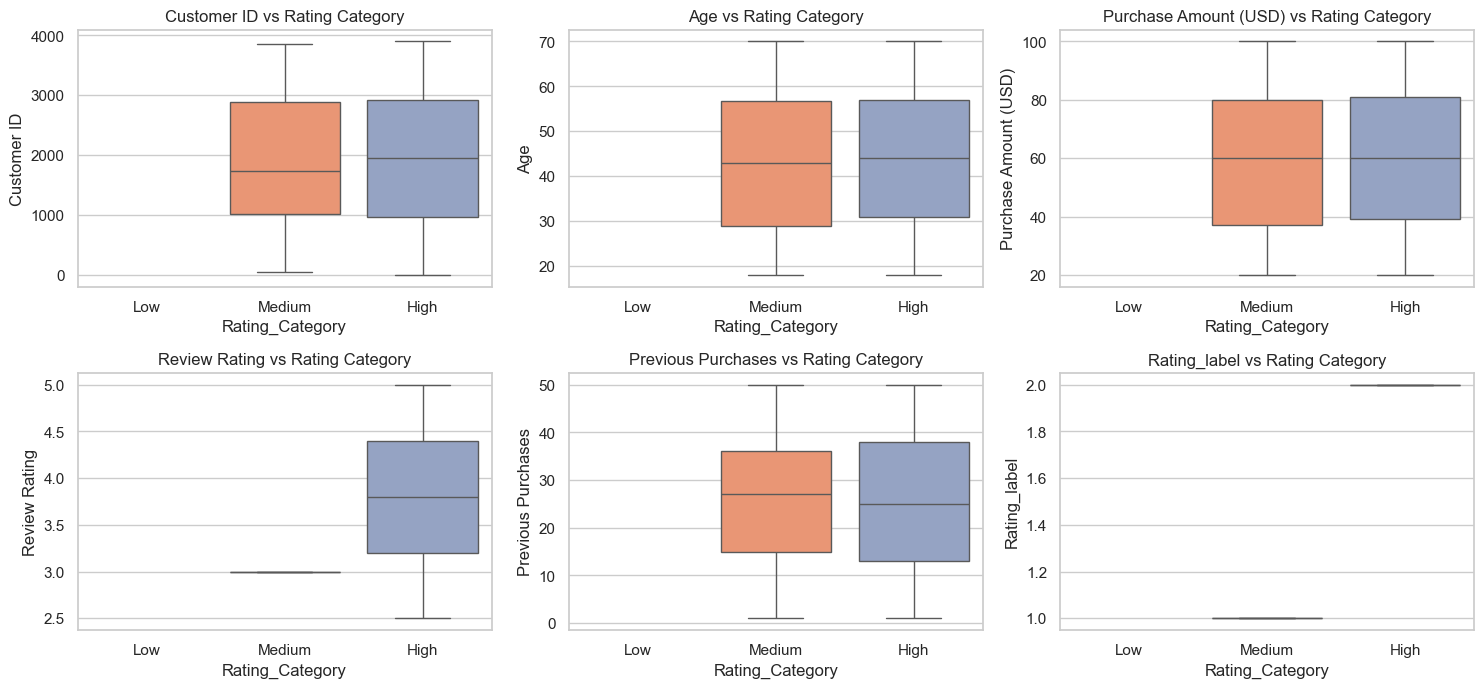

In [28]:
# plotting boxplot
# Shows how numerical features vary across target classes
plt.figure(figsize=(15, 10))    
for i, col in enumerate(numerical_cols):
    plt.subplot(3, 3, i + 1)
    sns.boxplot(x='Rating_Category', y=df[col], data=df, order=['Low','Medium','High'],palette='Set2')
    plt.title(f'{col} vs Rating Category')
plt.tight_layout()  
plt.show()


#### 4.5.2 Categorical Vs Target

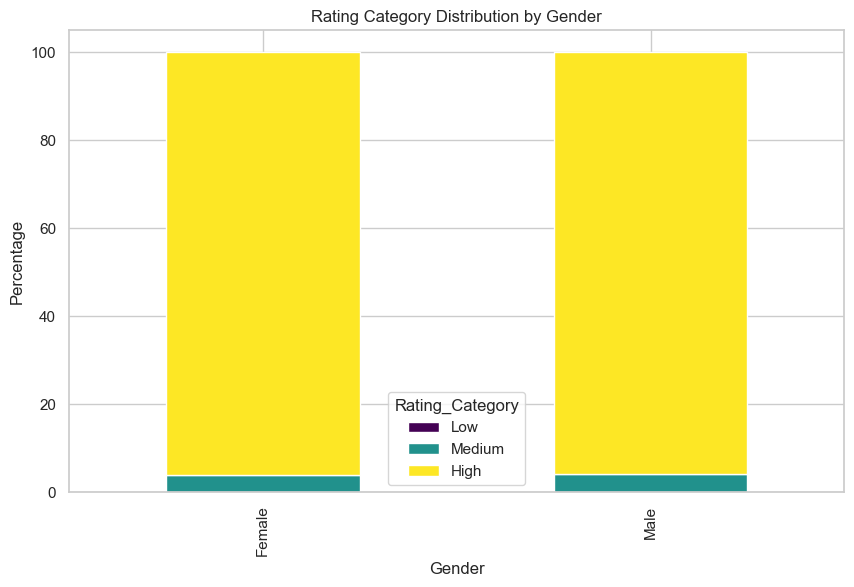

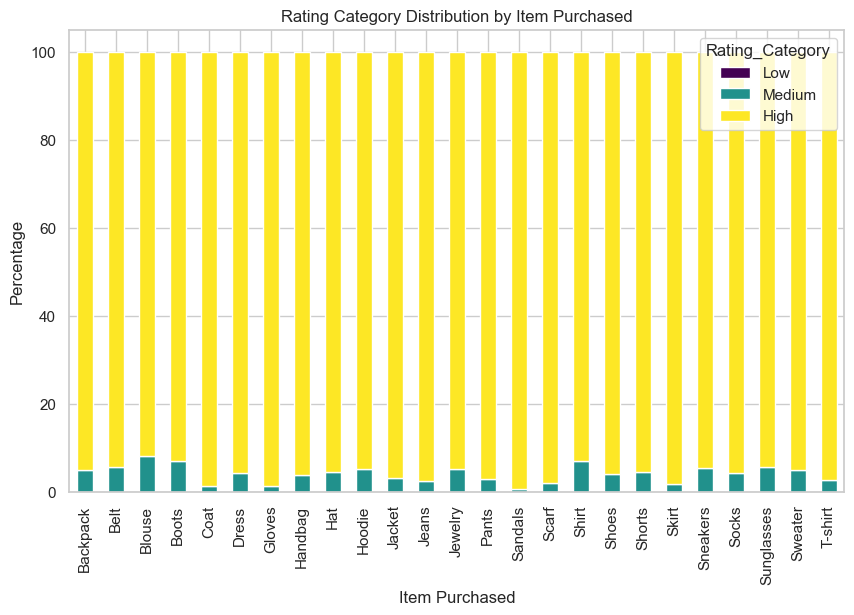

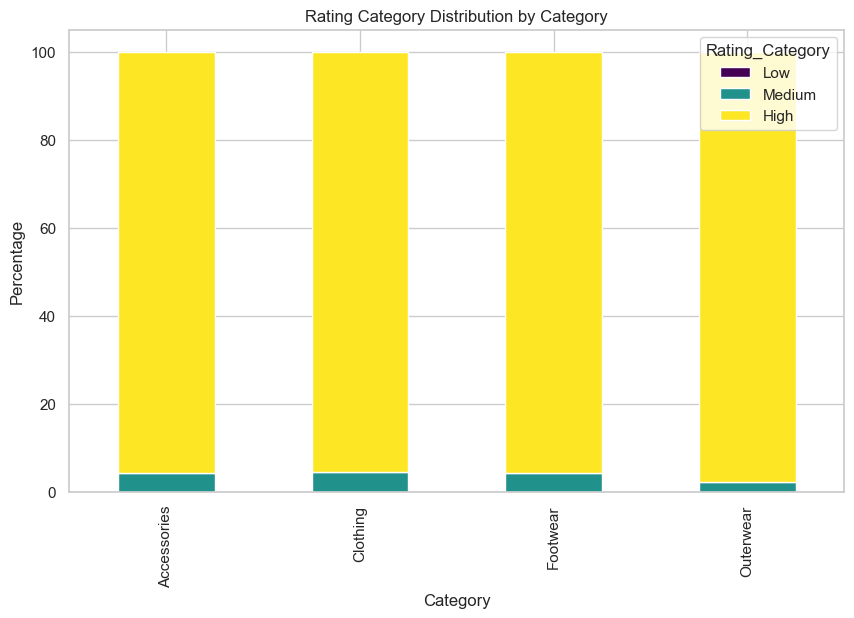

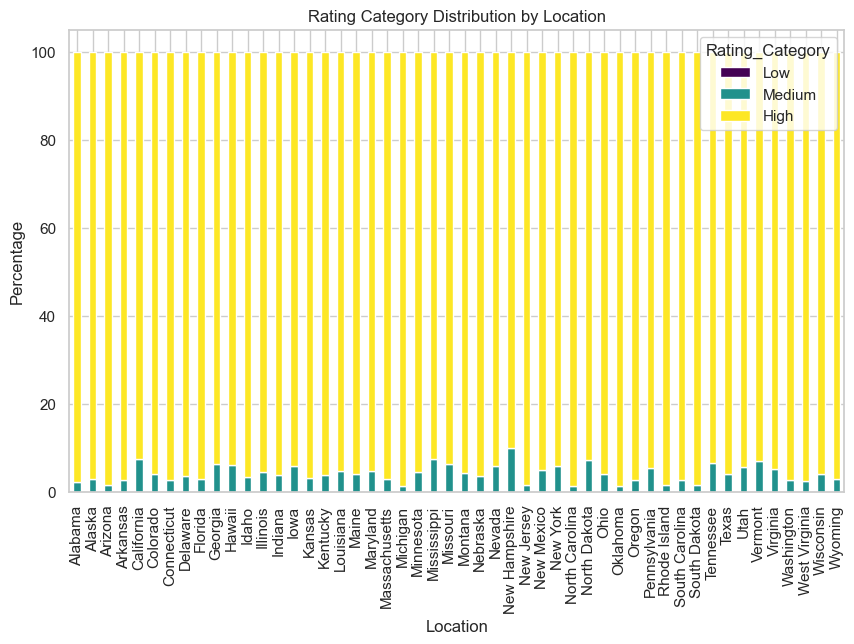

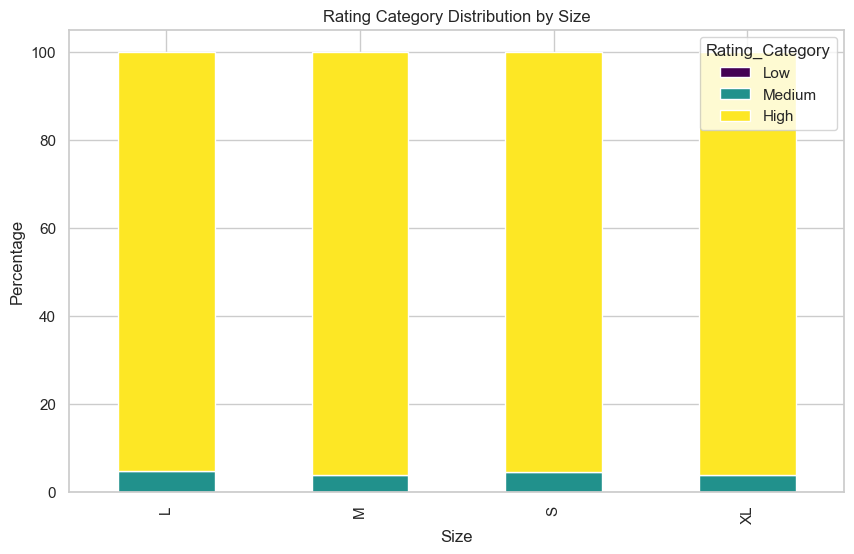

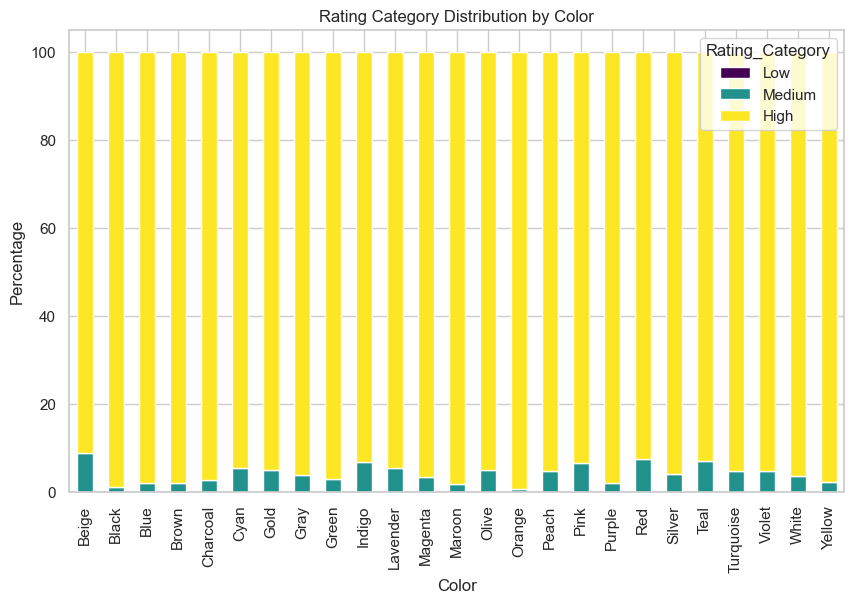

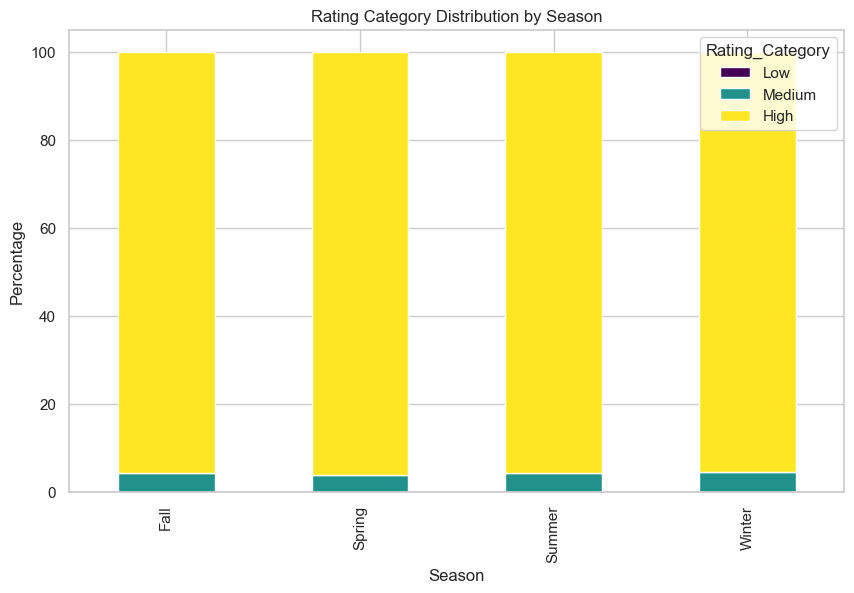

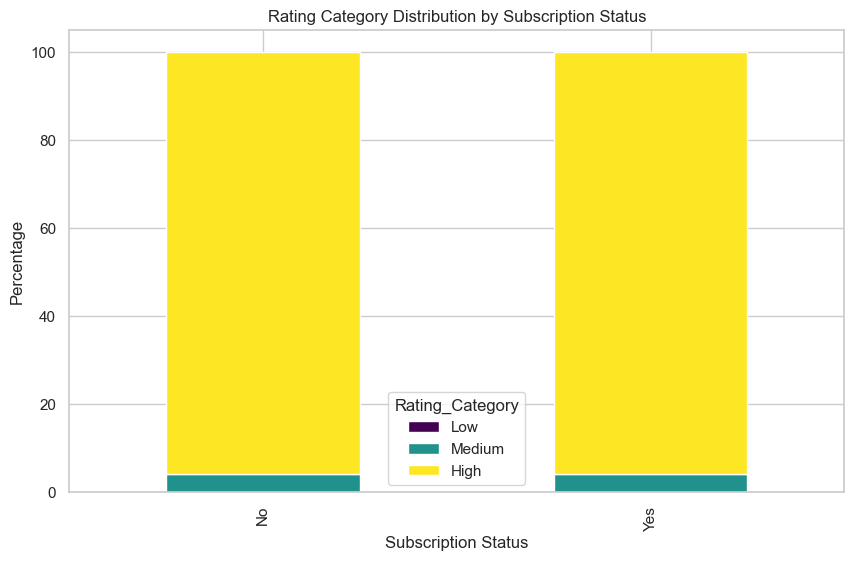

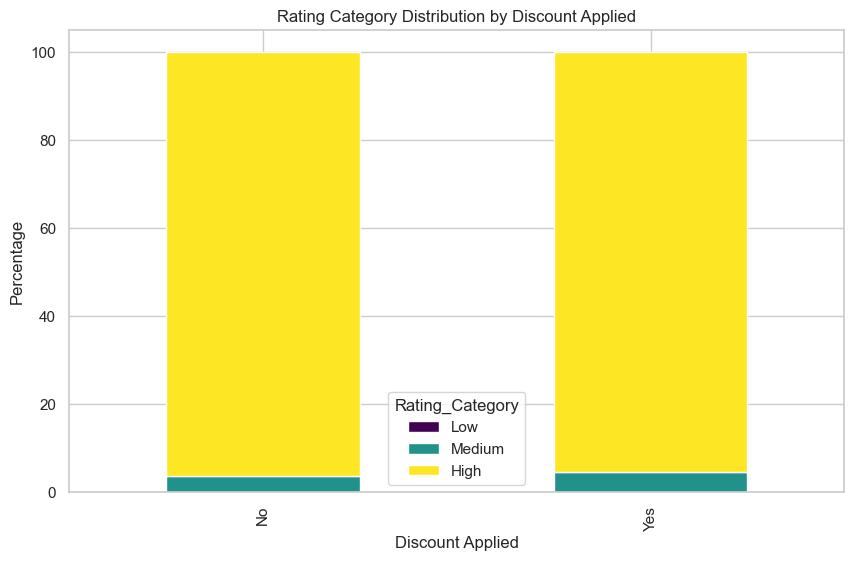

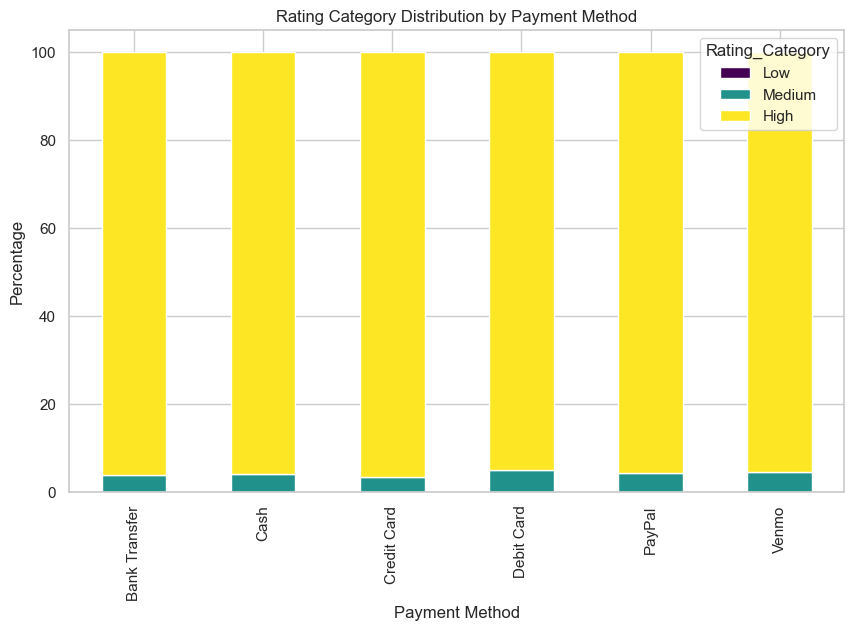

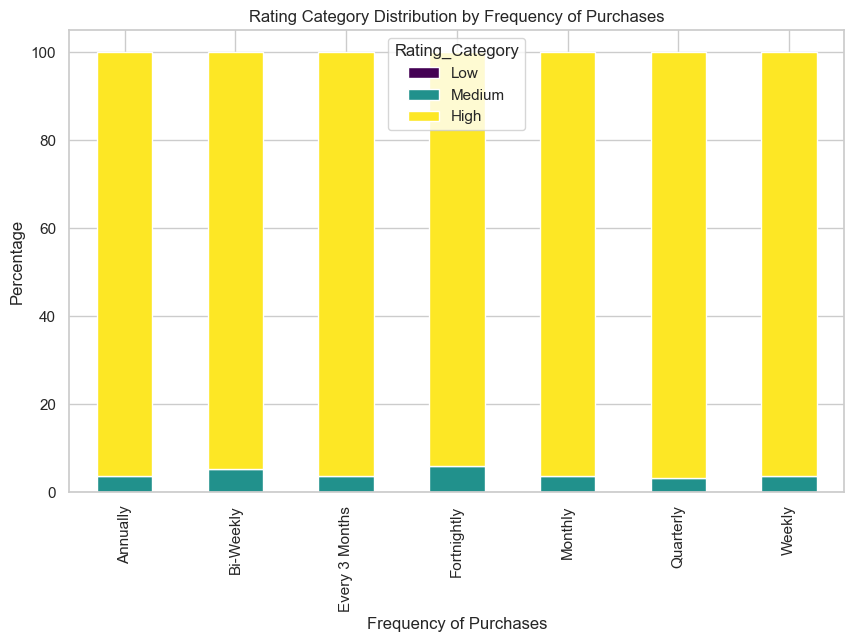

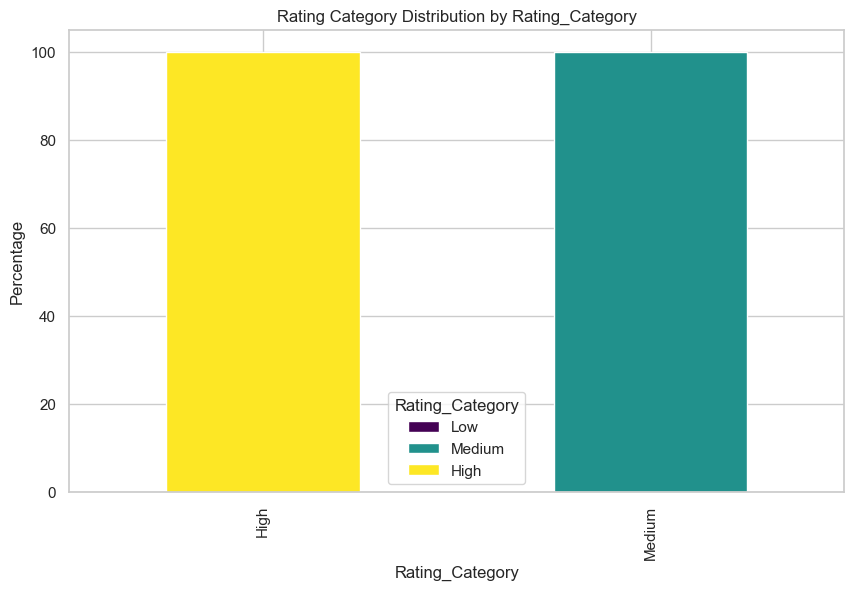

In [29]:
# Plotting stacked bar charts for categorical features
# Shows which customer catgeories gives better ratings
def stacked_bar(col):
    table = pd.crosstab(df[col], df['Rating_Category'], normalize='index').reindex(columns=['Low','Medium','High'],fill_value=0)* 100
    table.plot(kind='bar', stacked=True, figsize=(10,6), colormap='viridis')
    plt.title(f'Rating Category Distribution by {col}')
    plt.ylabel('Percentage')
    plt.xlabel(col) 
    plt.show()
for col in categorical_cols:
    stacked_bar(col)

### Step 5 Correlation Analysis

#### 5.1 Correlation Heatmap

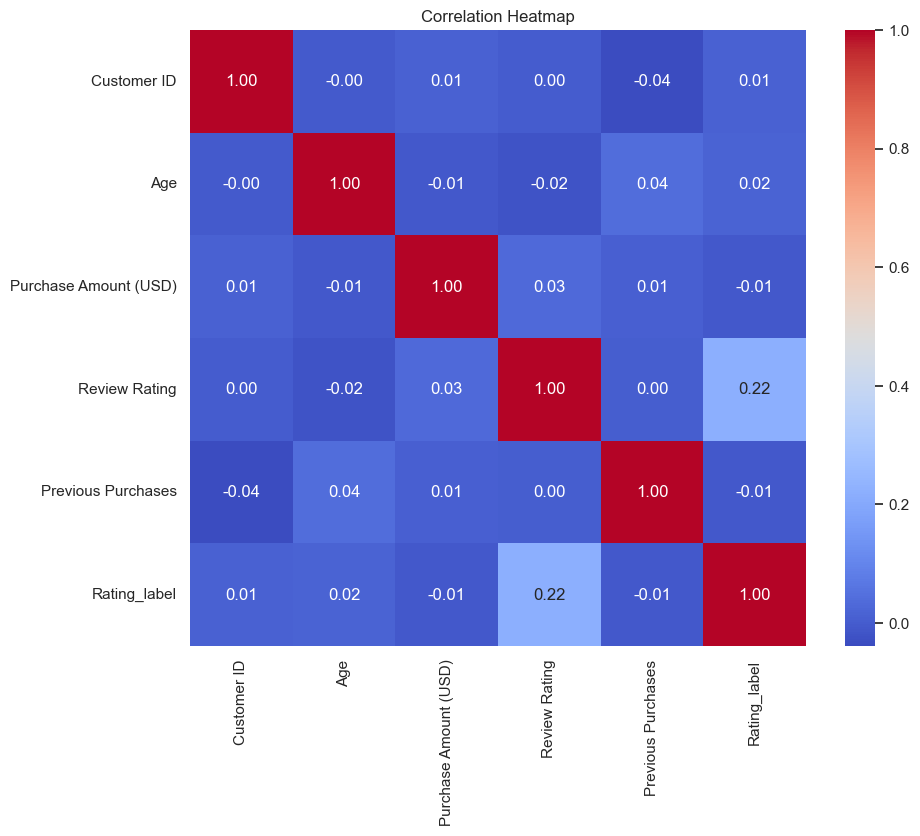

In [30]:
# plotting correlation heatmap
plt.figure(figsize=(10, 8)) 
corr = df[numerical_cols].corr()
sns.heatmap(corr, annot=True, fmt=".2f", cmap='coolwarm', square=True)
plt.title('Correlation Heatmap')
plt.show()


In [31]:
# correlation matrix

### Step 6 Data Preprocessing

#### 6.1 Selecting Features & Target

In [36]:
# Dropping unnecessary columns

df_model = df.drop(columns=['Review Rating', 'Rating_Category', 'Customer ID'])

# Features (X) and Target (y)
X = df_model.drop('Rating_label', axis=1)
y = df_model['Rating_label']

# Display shapes
print("Feature matrix shape:", X.shape)
print("Target vector shape:", y.shape)

Feature matrix shape: (3900, 14)
Target vector shape: (3900,)


#### 6.2 Seperate Numerical & Categorical Columns

In [37]:
# Identifying numerical and categorical columns
# Numerical columns for scaling, categorical for encoding
numerical_cols = X.select_dtypes(include=['int64', 'float64']).columns.to_list()
categorical_cols = X.select_dtypes(include=['object']).columns.to_list()

print("Numerical columns:", numerical_cols)
print("Categorical columns:", categorical_cols)

Numerical columns: ['Age', 'Purchase Amount (USD)', 'Previous Purchases']
Categorical columns: ['Gender', 'Item Purchased', 'Category', 'Location', 'Size', 'Color', 'Season', 'Subscription Status', 'Discount Applied', 'Payment Method', 'Frequency of Purchases']


#### 6.3 Train-Test Split

In [ ]:
# Stratify=y ensures the class proportions(Low, Medium, High) remain balanced in both sets
# Prevents bias towards majority class during training
X_train, X_test, y_train, y_test = train_test_split( X, y, test_size=0.2, random_state=42, stratify=y)
print("Training set shape:", X_train.shape, y_train.shape)

Training set shape: (3120, 14) (3120,)


### Step 7 Preprocessing Pipeline
#### Creating a single pipline that handles encoding and scaling automatically

#### Step 7.1 Define Transformers

In [42]:
# Numerical transformer: Scaling
numerical_transformer = Pipeline(steps=[
    ('scaler', StandardScaler())
])

# Categorical transformer: One-Hot Encoding
categorical_transformer = Pipeline(steps=[
    ('onehot', OneHotEncoder(handle_unknown='ignore'))
])

# Combine into a column transformer
preprocessor = ColumnTransformer(
    transformers=[
        ('num', numerical_transformer, numerical_cols),
        ('cat', categorical_transformer, categorical_cols)
    ])